In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
recipes_df = pd.read_csv('unapproved_recipes/RAW_recipes.csv')

In [3]:
recipes_df.shape

(231637, 12)

<Axes: >

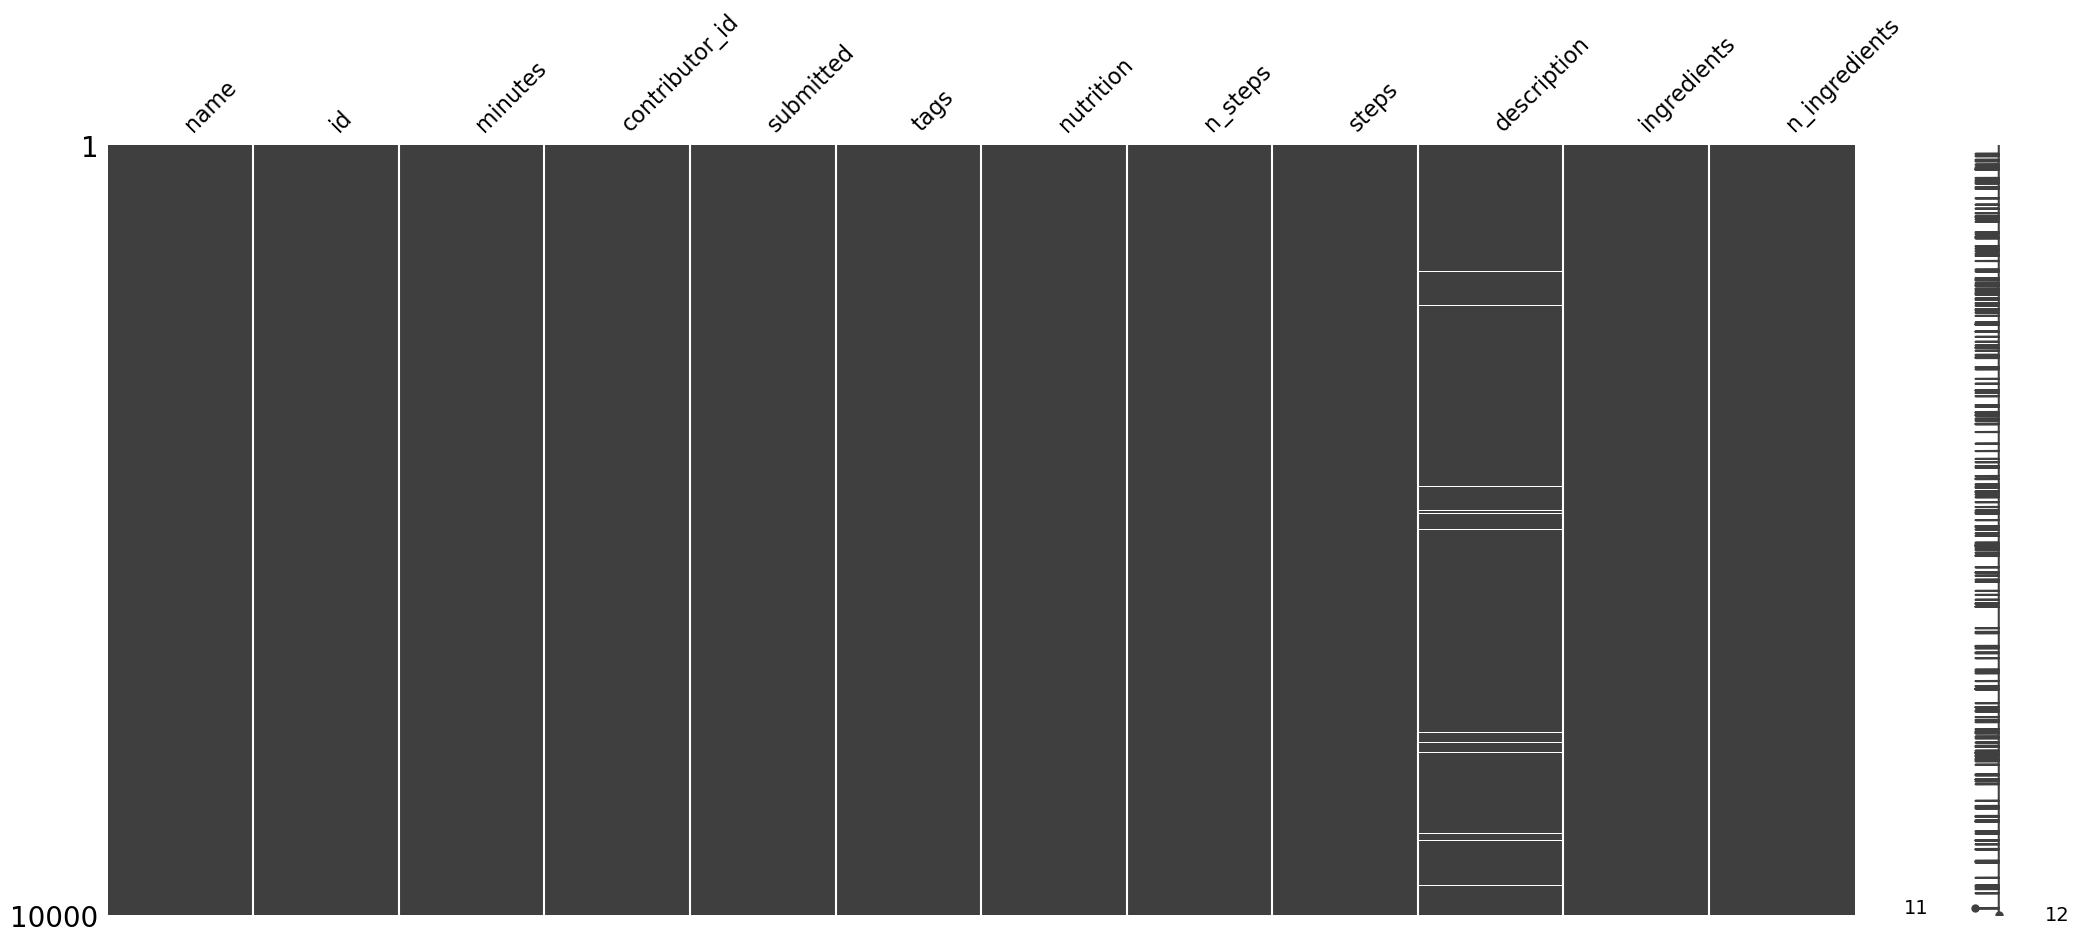

In [6]:
msno.matrix(recipes_df.sample(10_000))

In [11]:
recipes_df['tags'][0:5]


0    ['60-minutes-or-less', 'time-to-make', 'course...
1    ['30-minutes-or-less', 'time-to-make', 'course...
2    ['time-to-make', 'course', 'preparation', 'mai...
3    ['60-minutes-or-less', 'time-to-make', 'course...
4    ['weeknight', 'time-to-make', 'course', 'main-...
Name: tags, dtype: object

In [21]:
tag_list = recipes_df['tags'][0].split(',')

In [27]:
tag_list[0].strip("'[]")

'60-minutes-or-less'

In [58]:
def extract_tag(tag_string, primary_list):
    tag_list = tag_string.split(',')
    new_tags = []
    for tag in tag_list:
        tag = tag.replace('"', '')
        tag = tag.replace("'", "")
        tag = tag.replace('[', '')
        tag = tag.replace(']', '')
        tag = tag.strip()
        new_tags.append(tag)
    [primary_list.append(new_tag) for new_tag in new_tags]
    return

In [43]:
recipes_df['tags'][0].replace('[','')

"'60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']"

In [52]:
extract_tag(recipes_df['tags'][0])

['60-minutes-or-less',
 'time-to-make',
 'course',
 'main-ingredient',
 'cuisine',
 'preparation',
 'occasion',
 'north-american',
 'side-dishes',
 'vegetables',
 'mexican',
 'easy',
 'fall',
 'holiday-event',
 'vegetarian',
 'winter',
 'dietary',
 'christmas',
 'seasonal',
 'squash']

In [72]:
all_tags = []
recipes_df['tags'].apply(lambda x: extract_tag(x, all_tags))

0         None
1         None
2         None
3         None
4         None
          ... 
231632    None
231633    None
231634    None
231635    None
231636    None
Name: tags, Length: 231637, dtype: object

0        None
1        None
2        None
3        None
4        None
         ... 
99995    None
99996    None
99997    None
99998    None
99999    None
Name: tags, Length: 100000, dtype: object

In [73]:
len(all_tags)

4141688

In [76]:
unique_tags = pd.Series(all_tags).unique()

In [83]:
keywords = ['high', 'sodium', 'potassium', 'fat', 'fried', 'unhealthy', 'rich']

In [85]:
for word in keywords:
    [print(tag) for tag in unique_tags if word in tag]

high-calcium
high-in-something
high-protein
chicken-thighs-legs
high-fiber
high-in-something-diabetic-friendly
low-sodium
low-saturated-fat
low-fat
fathers-day


In [89]:
recipes_df.loc[recipes_df['tags'].str.contains('high-in-something') , 'name']

23                          deep fried dessert thingys
75                    pick me up  party chicken kabobs
86                      smoked  salmon  cracker spread
91                steamed  chicken cutlets in packages
147                 ant  kelly s london broil marinade
                              ...                     
231284                               zucchini pancakes
231331                                  zucchini puffs
231501    zucchini  tomato  and mozzarella quesadillas
231609    zurie s holey rustic olive and cheddar bread
231635          cookies by design   cookies on a stick
Name: name, Length: 11463, dtype: object

In [90]:
recipes_df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [91]:
recipes_df['nutrition'].head()

0         [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]
1     [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]
2    [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]
3     [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]
4     [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]
Name: nutrition, dtype: object

In [99]:
recipes_df['nutrition'].head()

0         [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]
1     [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]
2    [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]
3     [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]
4     [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]
Name: nutrition, dtype: object

In [108]:
cals = []
total_fat = []
sugar = []
sodium = []
protein = []
sat_fat = []

In [109]:
def nutrition_extractor(nutrition_string, cals_list, total_fat_list, sugar_list, sodium_list, protein_list, sat_fat_list):
    split_string = nutrition_string.split(',')
    new_values = []
    for n in split_string:
        n = n.replace('[', '')
        n = n.replace(']', '')
        n = n.strip()
        new_values.append(float(n))
    cals_list.append(new_values[0])
    total_fat_list.append(new_values[1])
    sugar_list.append(new_values[2])
    sodium_list.append(new_values[3])
    protein_list.append(new_values[4])
    sat_fat_list.append(new_values[5])


In [111]:
recipes_df['nutrition'].apply(lambda x: nutrition_extractor(x, cals, total_fat, sugar, sodium, protein, sat_fat))

0         None
1         None
2         None
3         None
4         None
          ... 
231632    None
231633    None
231634    None
231635    None
231636    None
Name: nutrition, Length: 231637, dtype: object

In [115]:
recipes_df['cals'] = cals
recipes_df['total_fat'] = total_fat
recipes_df['sugar'] = sugar
recipes_df['sodium'] = sodium
recipes_df['protein'] = protein
recipes_df['saturated_fat'] = sat_fat

In [116]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,cals,total_fat,sugar,sodium,protein,saturated_fat
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0


In [122]:
recipes_df['sodium_protein_satfat'] = recipes_df['sodium']+recipes_df['protein']+recipes_df['saturated_fat']

In [127]:
recipes_df.to_csv('unapproved_recipes_with_nutrition_breakdown.csv', index = False)